In [62]:
##using pd_np_plt_etc enviroment
import subprocess
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

##go to folder
os.chdir('/archive/mirzaa_g/exomes/result_files_0321/graphing_0321')

Setup Complete


In [14]:
##got master ped tracking 031921, so import
exome_data = pd.read_excel("master_ped_tracking_120920.xlsx", 
                    sheet_name='Ped Tracking', index_col='family_id',
     engine='openpyxl')

# exome_data.head()
exome_data.shape

(619, 88)

In [26]:
##only use the families we want
exome_data_red = exome_data.loc[exome_data['dbd_include'] == 1]
exome_data_red.shape

(545, 88)

In [27]:
##ped types
ped_type_counts = exome_data_red.classification.value_counts()
print(ped_type_counts)


Trio           383
Singleton       48
Trio*           41
Duo             31
Quad            21
Multiplex        9
Sibship          4
Duo*             4
Singleton*       3
Parent-sibs      1
Name: classification, dtype: int64


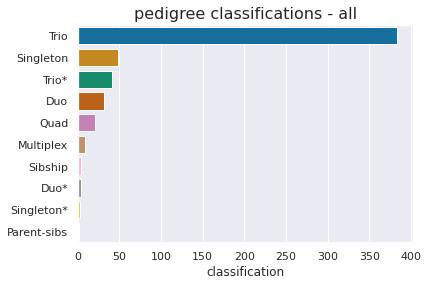

In [28]:
##seaborn alt bar chart
plt.title('pedigree classifications - all', fontsize =16)
ped_type_counts = exome_data_red.classification.value_counts()
sns.barplot(y=ped_type_counts.index, x=ped_type_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("all_pedigree_types.barchart.pdf", bbox_inches="tight")

<class 'pandas.core.series.Series'>


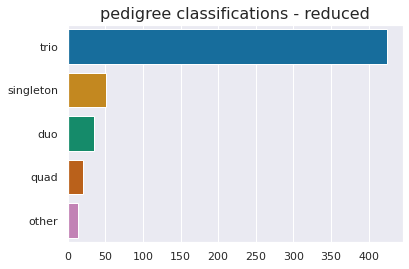

In [29]:
##graph ped types, but combine some type... use apply
def new_ped_type(row):
    if row.classification == 'Trio*' or row.classification == 'Trio':
        return 'trio'
    elif row.classification == 'Singleton*' or row.classification == 'Singleton':
        return 'singleton'
    elif row.classification == 'Duo*' or row.classification == 'Duo':
        return 'duo'
    elif row.classification == 'Quad*' or row.classification == 'Quad':
        return 'quad'
    else:
        return 'other'

ped_types = exome_data_red.apply(new_ped_type, axis='columns')

ped_type_counts = ped_types.value_counts()

print(type(ped_type_counts))

##barchart
plt.title('pedigree classifications - reduced', fontsize =16)
sns.set(font_scale=1) 
sns.barplot(y=ped_type_counts.index, x=ped_type_counts, ci=None, palette="colorblind",orient='h' )
plt.savefig("reduced_pedigree_types.barchart.pdf", bbox_inches="tight")

In [37]:
##ethniticties -- all the same within pedigree
# ped_type_counts = exome_data_red["Original ethnicity"].value_counts()
eth_type_counts = exome_data_red["NIH Ethnicity"].str.split(',').str[0].value_counts()
print(eth_type_counts)


White                 336
Unknown               126
Mixed                  59
Asian                  18
Black or African        4
Hispanic or Latino      2
Name: NIH Ethnicity, dtype: int64


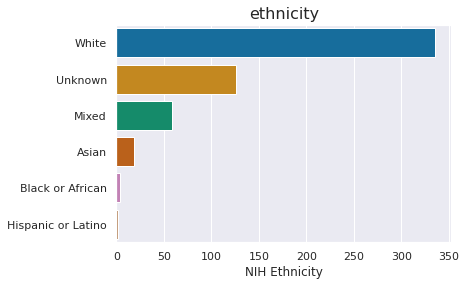

In [38]:
##seaborn alt bar chart
plt.title('ethnicity', fontsize =16)
sns.barplot(y=eth_type_counts.index, x=eth_type_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("ethnicity_types.barchart.pdf", bbox_inches="tight")

In [39]:
##proband gender (just get first gender, may need to get all)
gender_counts = exome_data_red["Gender* "].str.split(',').str[0].value_counts()
print(gender_counts)

m          299
f          232
unknown     14
Name: Gender* , dtype: int64


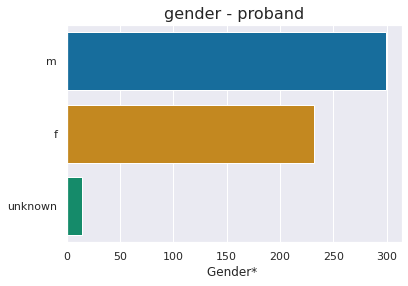

In [40]:
##seaborn alt bar chart
plt.title('gender - proband', fontsize =16)
sns.barplot(y=gender_counts.index, x=gender_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("gender_proband.barchart.pdf", bbox_inches="tight")

In [46]:
##proband sample type (just get first gender, may need to get all)
sample_counts = exome_data_red.proband_sample_type.str.split(',').str[0].str.split(' ').str[0].str.split('-').str[0].str.lower().value_counts()
print(sample_counts)

blood           229
saliva          197
dna              60
fibroblasts      12
brain            12
pericranium       8
fibroblast        8
skin              2
buccal            2
peripheral        2
lb                1
missing           1
paraffin          1
lipoma            1
saliva/cheek      1
cultured          1
eyelid            1
tumor             1
cerebellum        1
tooth             1
Name: proband_sample_type, dtype: int64


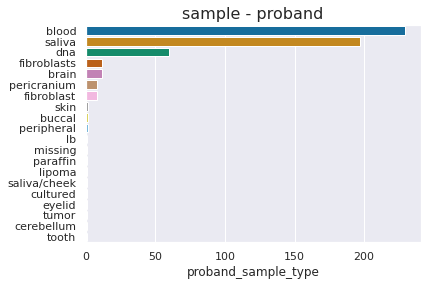

In [47]:
##seaborn alt bar chart
plt.title('sample - proband', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("sample_type_proband.barchart.pdf", bbox_inches="tight")

# next attempts 0421

In [9]:
##manually make tissue types i.e. get proband_sample_type column and replace , with \n
sample_info_file = 'sample_types_040521.txt'
si = pd.read_csv(sample_info_file, delimiter='\t')
sample_counts = si.proband_sample_type.str.split(' ').str[0].value_counts()
si.head()
sample_counts

blood          250
saliva         227
DNA             60
brain           30
fibroblasts     29
tissue          17
Name: proband_sample_type, dtype: int64

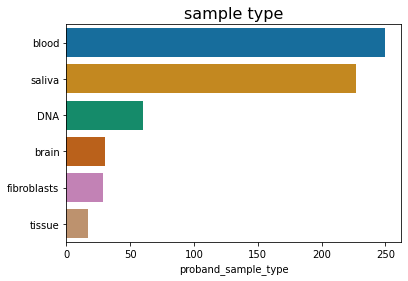

In [13]:
##seaborn alt bar chart
plt.title('sample type', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("sample_types_all.barchart.040521.pdf", bbox_inches="tight")

In [20]:
##manually make ped type from classification col of latest master
ped_info_std_file = 'ped_types_gl_040521.txt'
ped_info_mosaic_file = 'ped_types_mos_040521.txt'
ped_info_comb_file = 'ped_types_combined_040521.txt'

pis = pd.read_csv(ped_info_std_file, delimiter='\t')
pim = pd.read_csv(ped_info_mosaic_file, delimiter='\t')
pic = pd.read_csv(ped_info_comb_file, delimiter='\t')
sample_counts_std = pis.classification.str.split(' ').str[0].value_counts()
sample_counts_mosaic = pim.classification.str.split(' ').str[0].value_counts()
sample_counts_combined = pic.classification.str.split(' ').str[0].value_counts()
sample_counts_mosaic


Trio*         37
Duo*           4
Singleton*     3
Name: classification, dtype: int64

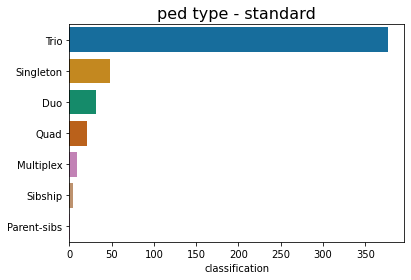

In [21]:
##seaborn alt bar chart - ped types standard
plt.title('ped type - standard', fontsize =16)
sns.barplot(y=sample_counts_std.index, x=sample_counts_std, ci=None, orient='h', palette="colorblind" )
plt.savefig("pedigree_types_standard.barchart.040521.pdf", bbox_inches="tight")


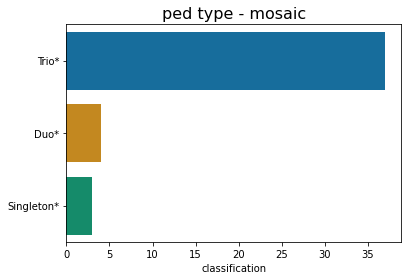

In [22]:
##seaborn alt bar chart - ped types mosaic
plt.title('ped type - mosaic', fontsize =16)
sns.barplot(y=sample_counts_mosaic.index, x=sample_counts_mosaic, ci=None, orient='h', palette="colorblind" )
plt.savefig("pedigree_types_mosaic.barchart.040521.pdf", bbox_inches="tight")

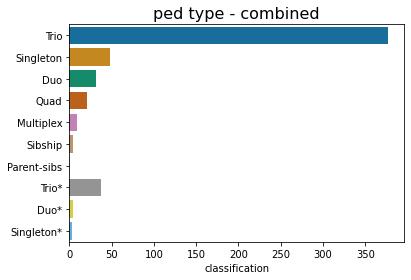

In [23]:
##seaborn alt bar chart - ped types combined and ordered
plt.title('ped type - combined', fontsize =16)
order_list = ['Trio', 'Singleton', 'Duo', 'Quad', 'Multiplex', 'Sibship', 'Parent-sibs', 'Trio*', 'Duo*', 'Singleton*']
sns.barplot(y=sample_counts_combined.index, x=sample_counts_combined, ci=None, orient='h', palette="colorblind", order=order_list )
plt.savefig("pedigree_types_combined.barchart.040521.pdf", bbox_inches="tight")

In [54]:
##proband counts per ped - count per dx
sample_info_file = 'proband_counts_dx_040521.txt'
sample_counts_per_ped = pd.read_csv(sample_info_file, delimiter='\t',index_col="DxGroup1")
sample_counts_per_ped.head()

,1 sample,2 or more samples
DxGroup1,,
DEVN,35,1
MCD,74,5
MEG,77,30
MHM,181,4
MIC,91,2


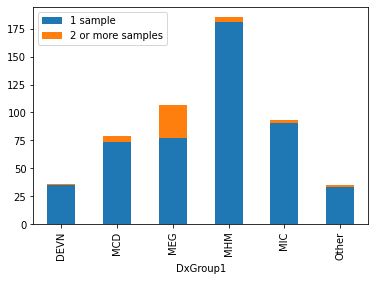

In [55]:
##then graph
sample_counts_per_ped.plot(kind='bar',stacked=True)
plt.savefig("proband_counts_per_dx.stacked_barchart.040521.pdf", bbox_inches="tight")

In [56]:
##manually make ethnicity i.e. get column
ethnicity_info_file = 'ethnicity_per_ped_040521.txt'
eth = pd.read_csv(ethnicity_info_file, delimiter='\t')
sample_counts = eth.Ethnicity.str.split(',').str[0].value_counts()
sample_counts

White                 330
Unknown               124
Mixed                  57
Asian                  18
Black or African        4
Hispanic or Latino      2
Name: Ethnicity, dtype: int64

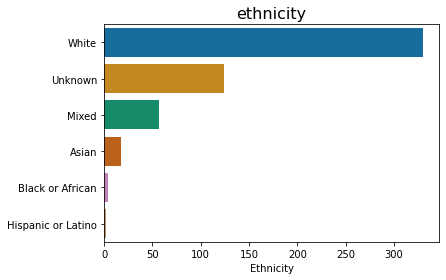

In [57]:
##seaborn alt bar chart
plt.title('ethnicity', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("ethnicity.barchart.040521.pdf", bbox_inches="tight")

In [58]:
##manually make tissue types i.e. get proband_sample_type column and replace , with \n
gender_info_file = 'gender_040521.txt'
gi = pd.read_csv(gender_info_file, delimiter='\t')
sample_counts = gi.Gender.str.split(' ').str[0].value_counts()
si.head()
sample_counts

male       316
female     250
unknown      9
Name: Gender, dtype: int64

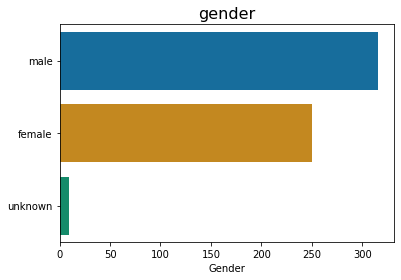

In [59]:
##seaborn alt bar chart
plt.title('gender', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("gender.barchart.040521.pdf", bbox_inches="tight")

In [78]:
##coverage boxplots 0421
cov_all_file = 'coverage_all_040721.txt'
ca = pd.read_csv(cov_all_file, delimiter='\t')
cov_brain_file = 'coverage_brain_peds_040721.txt'
cb = pd.read_csv(cov_brain_file, delimiter='\t')
cb.head()

,sample_id,ped_id,samples,ped_type,dx,sample_type,sample_type_alt,coverage
0,LR12-265-1311084-1-A5,LR12-265,2,Trio*,MEG,saliva,not_brain,96.741623
1,LR12-265-1401013-2-B4,LR12-265,2,Trio*,MEG,brain,brain,243.410267
2,LR12-266-1401014-1-C3,LR12-266,2,Trio*,MEG,brain,brain,194.020598
3,LR12-266-1404075-1-A8,LR12-266,2,Trio*,MEG,saliva,not_brain,116.076124
4,LR12-420-1210104-4-A1,LR12-420,2,Trio*,MEG,brain,brain,305.260622


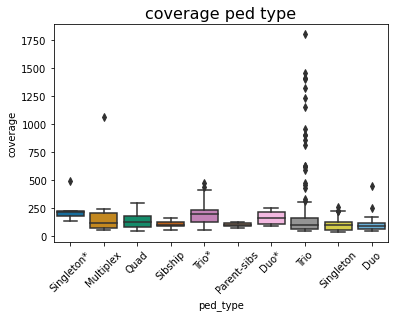

In [82]:
##all samples coverage ped type
plt.title('coverage ped type', fontsize =16)
sns.boxplot( x=ca["ped_type"], y=ca["coverage"], palette="colorblind")
plt.xticks(rotation=45)
plt.savefig("coverage.ped_type.boxplot.040721.pdf", bbox_inches="tight")

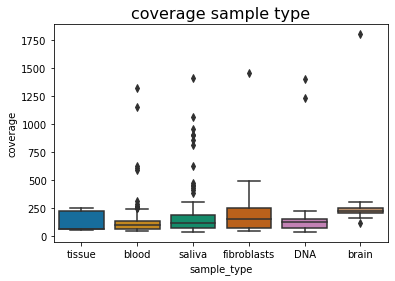

In [75]:
##all samples coverage sample type
plt.title('coverage sample type', fontsize =16)
sns.boxplot( x=ca["sample_type"], y=ca["coverage"], palette="colorblind") 
plt.savefig("coverage.sample_type.boxplot.040721.pdf", bbox_inches="tight")

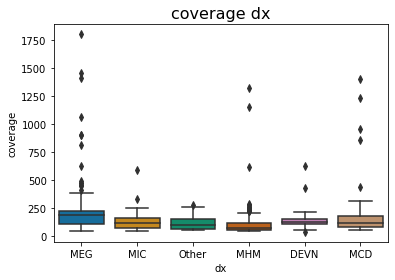

In [76]:
##all samples coverage dx
plt.title('coverage dx', fontsize =16)
sns.boxplot( x=ca["dx"], y=ca["coverage"], palette="colorblind") 
plt.savefig("coverage.dx.boxplot.040721.pdf", bbox_inches="tight")

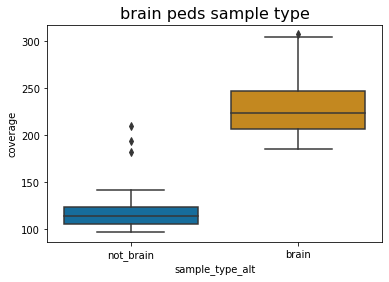

In [80]:
##brain peds coverage ped type
plt.title('brain peds sample type', fontsize =16)
sns.boxplot( x=cb["sample_type_alt"], y=cb["coverage"], palette="colorblind") 
plt.savefig("coverage.sample_type_brain_peds.boxplot.040721.pdf", bbox_inches="tight")